# **MEF Metric Plotter - Cumulative**
## **High Resolution Sea Ice Diagsnostics Toolset**
 Cameron Carver - University of Cape Town - Jan 2025

This script accesses the locally stored multi-model MEF file and plots each of the<br> following for each model as a combined plot:<br>
    - Annual Mean<br>
    - Seasonal Mean<br>
    - Monthly Mean<br>
    - Time Series<br>
    - Seasonal Distribution<br>
    - Monthly Distribution<br>

### 1. Import Relevant Packages

In [1]:
import os; os.chdir('/Users/crcarver/Desktop/AOS_THESIS/MSc_Cameron/Data/')
# os.chdir('') # User can provide root directory information here to simplify directory path definitions elsewhere 
import xarray as xr
import calendar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap

### 2. Import Model Data
Select cumulative MEF metric file containing metrics desired to be plotted.
Multiple can be combined by uncommenting the appropriate line defined below. 

Extract respective categorised MEF Metrics

In [2]:
## Combine multiple cumulative MEF datasets
# MEF1 = xr.open_dataset('CMIP-MEF/CMIP-24-MEF_DEF.nc') #CMIP
# MEF2 = xr.open_dataset('HRMIP-MEF/HRMIP-6-MEF_DEF.nc') #HighResMIP
# MEF_ds = xr.concat([MEF1, MEF2],dim=('models'))
# MEF_ds = MEF_ds.sortby('model_name')

MEF_ds = xr.open_dataset('HRMIP-MEF/HRMIP-6-MEF_DEF.nc') #HighResMIP
MEF_ds = MEF_ds.sortby('model_name')

MEF_a, MEF_s, MEF_m, MEF_b, model = MEF_ds.MEF_a, MEF_ds.MEF_s, MEF_ds.MEF_m, MEF_ds.MEF_b, MEF_ds.model_name.values
mct = MEF_ds.models.size

### 3. Import Reference Grid and Define Plotting Details
Import the ancillary file of the observational data. <br>
Data Access https://nsidc.org/data/g02202/versions/4 <br>
Ancilliary File: https://noaadata.apps.nsidc.org/NOAA/G02202_V4/ancillary/<br>
Provides the reference grid of which model data will be reprojected onto.

In [3]:
access_ref_data = 'OBSERVATIONS/SICONC/G02202-cdr-ancillary-sh.nc'
ref_ds = xr.open_dataset(access_ref_data)

levels=[ 0, 0.2, 0.5, 0.65, 1.0]
colors = ['peru', 'yellowgreen', 'deepskyblue', 'royalblue']
cmap = mcolors.ListedColormap(colors)
cmap.set_under('darkred')

### 4. Plot Annual Means
Modify subplot gridsize as necessary for number of models to be plotted. <br>
Define desired plot image destination and name.

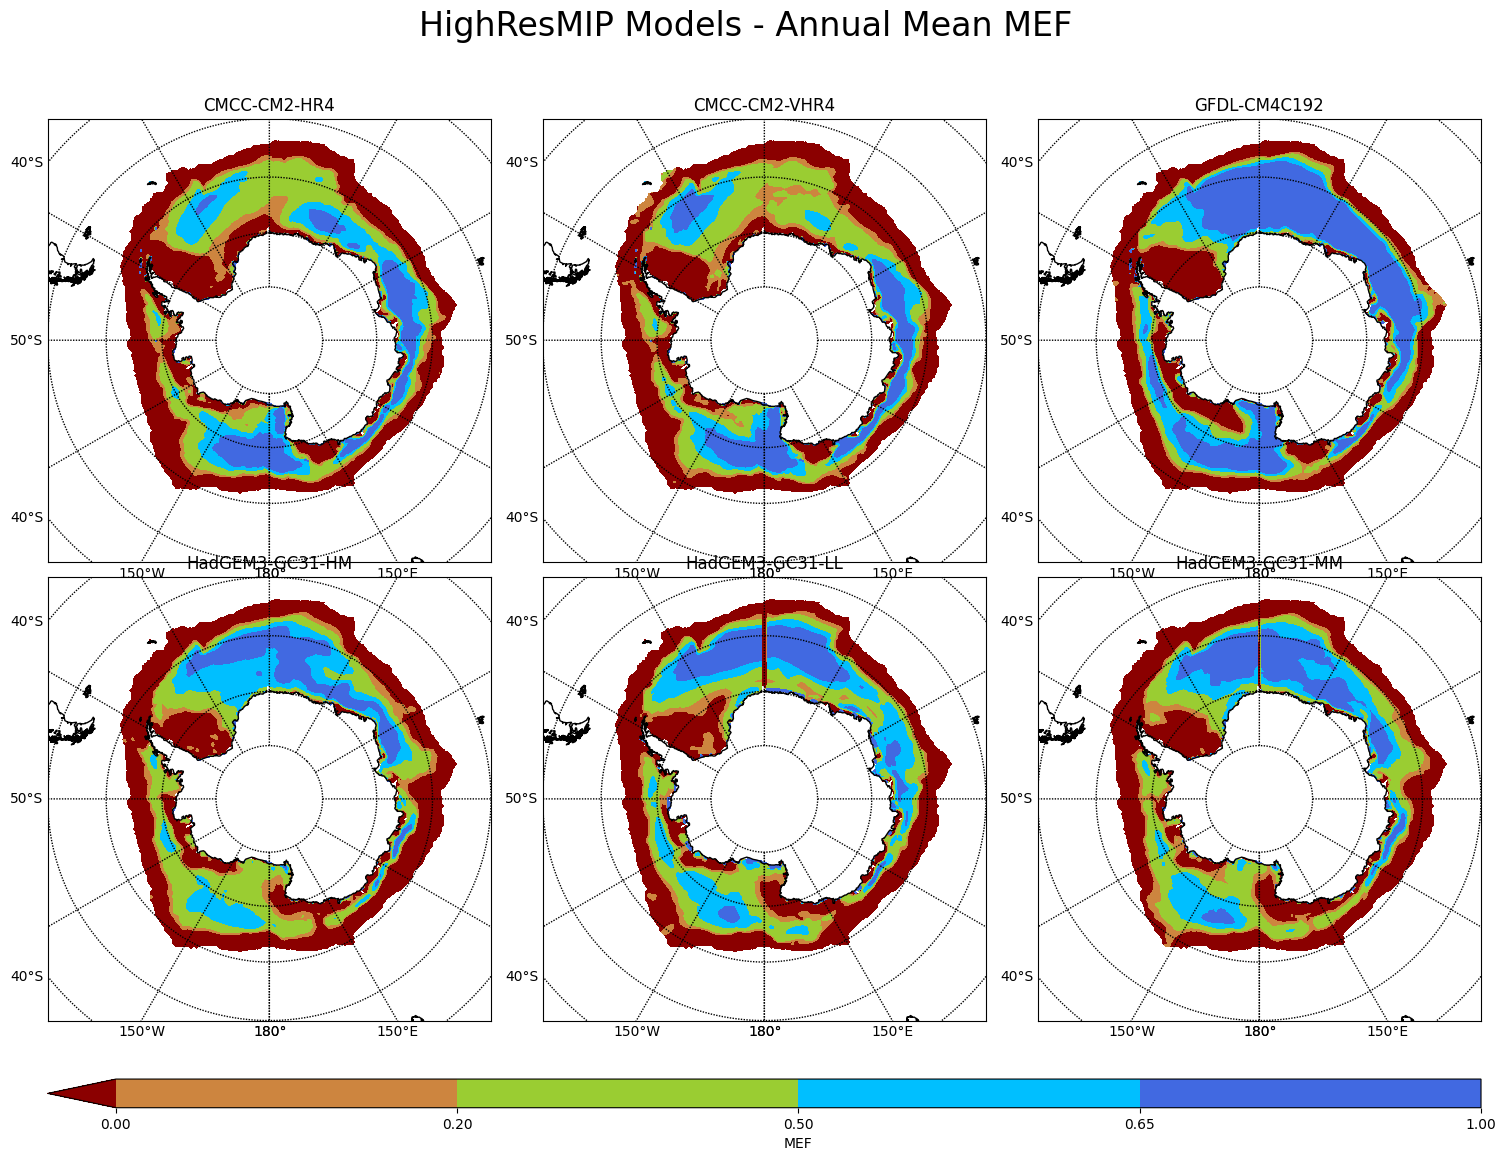

In [4]:
for j in range(1):
    fig, axes = plt.subplots(int(mct/3), 3, figsize=(15, 12)) # Adjust grid size here
    for i in range(0,mct):
        ax = axes[i // 3, i % 3]
        m = Basemap(projection='spstere', boundinglat=-50, lon_0=180, resolution='l', ax=ax)
        x, y = m(ref_ds.longitude.values, ref_ds.latitude.values)
        contour = m.contourf(x, y, MEF_a[i+j*int(mct/2),:,:].values, levels=levels, cmap=cmap, extend='min')
        m.drawcoastlines()
        m.drawparallels(np.arange(-90., 0., 10.), labels=[1,0,0,0])
        m.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1])
        ax.set_title(f'{model[i+j*int(mct/2)]}')
    plt.tight_layout()
    fig.suptitle('HighResMIP Models - Annual Mean MEF', fontsize=24, y=1.05) 
    cbar = fig.colorbar(contour, ax=axes.ravel().tolist(), pad=0.05, orientation='horizontal', aspect=50)
    cbar.set_label('MEF')
    # plt.savefig(f'/Data/PLOTS/Combined/Annual-Mean/Cumulative_AM-{j}.pdf', bbox_inches='tight') # Define desired plot image destination and name.

### 5. Plot MEF Time Series
Modify subplot gridsize as necessary for number of models to be plotted. <br>
Define desired plot image destination and name.

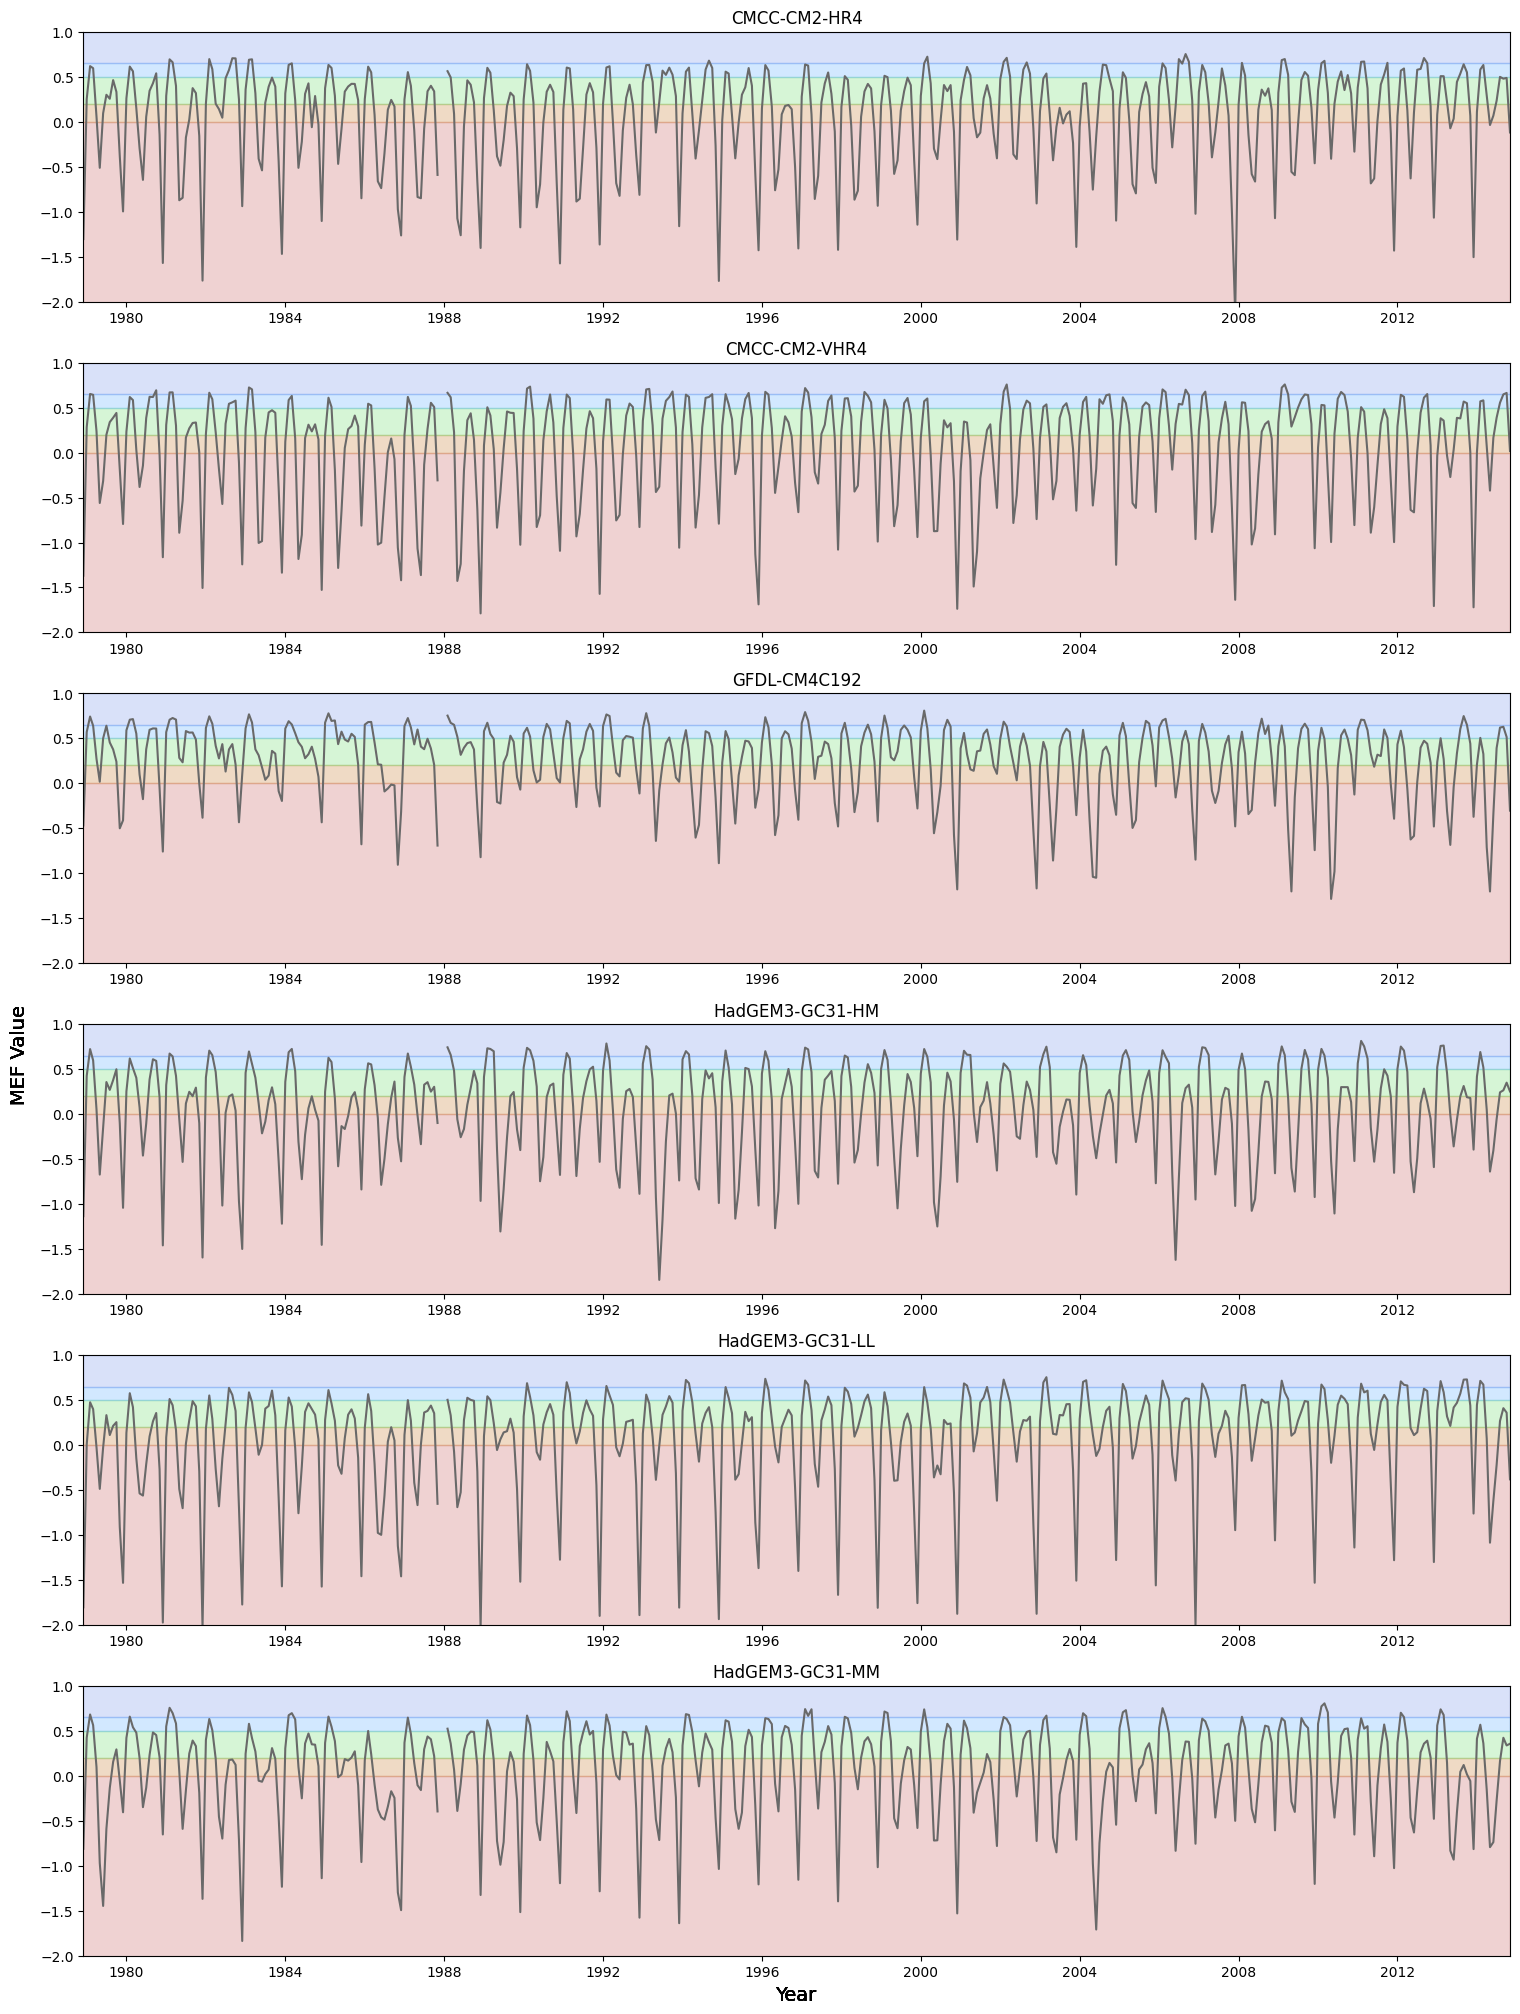

In [5]:
for j in range(0,int(mct/6)):
    fig, axes = plt.subplots(mct, 1, figsize=(15, 20)) # Adjust grid size here
    for i in range(mct):
        ax = axes[i]
        MEF_b[i+j*int(mct/5),:].plot(color='dimgray', ax=ax)
        ax.set_ylim(bottom=-2, top = 1); ax.set_xlim(MEF_b.time.min(), MEF_b.time.max())
        ax.fill_between(MEF_b.time, -10, 0, color='firebrick', alpha=0.2, label='Bad')
        ax.fill_between(MEF_b.time, 0, 0.2, color='peru', alpha=0.3, label='Poor')
        ax.fill_between(MEF_b.time, 0.2, 0.5, color='limegreen', alpha=0.2, label='Good')
        ax.fill_between(MEF_b.time, 0.5, 0.65, color='dodgerblue', alpha=0.2, label='Very Good')
        ax.fill_between(MEF_b.time, 0.65, 1, color='royalblue', alpha=0.2, label='Excellent')
        ax.set_xlabel(''); ax.set_ylabel(''); ax.set_title(f'{model[i+j*int(mct/5)]}')

        fig.text(-0.01, 0.47, 'MEF Value', va='center', rotation='vertical', fontsize=14)
        fig.text(0.5, 0, 'Year', va='center', rotation='horizontal', fontsize=14)
    plt.tight_layout()
    # plt.savefig(f'/Data/PLOTS/Combined/Time-Series/Cumulative_TS-{j}.pdf', bbox_inches='tight') # Define desired plot image destination and name.

### 6. Define Distributon Plot Details
Modify subplot gridsize as necessary for number of models to be plotted. <br>
Define desired plot image destination and name.

In [6]:
from matplotlib.colors import ListedColormap
import pandas as pd
# %% Plot Details
bins = [-np.inf, 0, 0.2, 0.5, 0.65, np.inf]
bins2 = [-np.inf, 1, 2, 3, 4, np.inf]
labels = ['Bad', 'Poor', 'Good', 'Very Good', 'Excellent',]
colors = {
    'Bad': 'firebrick',
    'Poor': 'sandybrown',
    'Good': 'yellowgreen',
    'Very Good': 'skyblue',
    'Excellent': 'royalblue',
}
cmap = ListedColormap(colors)

### 7. Plot Seasonal Performance Distributions
Modify subplot gridsize as necessary for number of models to be plotted. <br>
Define desired plot image destination and name.

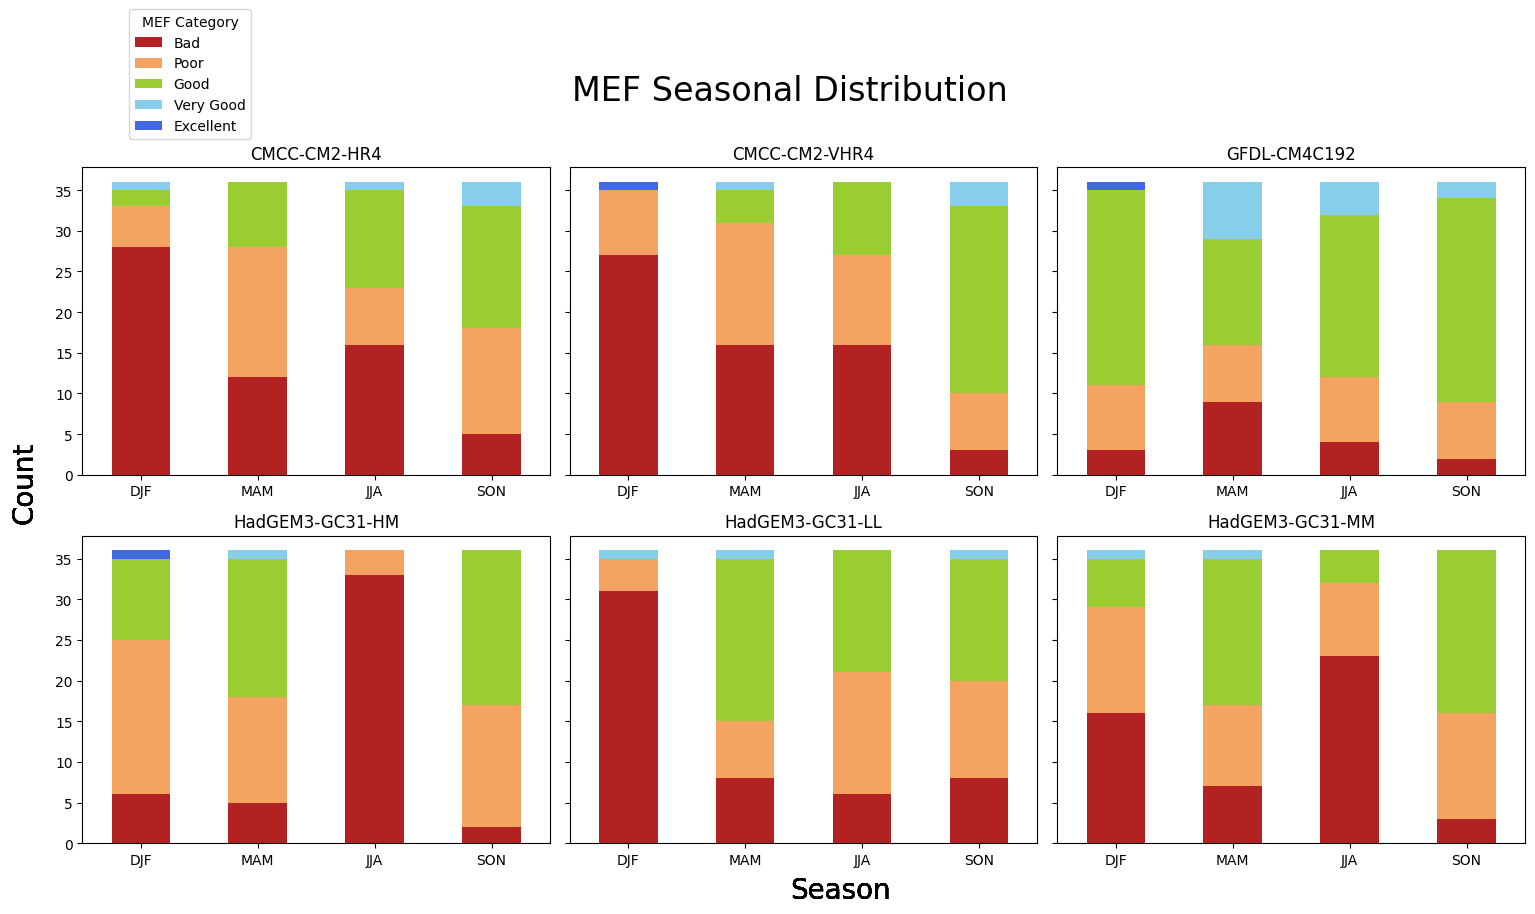

In [7]:
for j in range(0,int(mct/6)):
    fig, axes = plt.subplots(int(mct/3), 3, figsize=(15, 8)) # Adjust grid size here
    
    for i in range(0,mct):
        ax = axes[i // 3, i % 3]
        seasonal_data = MEF_b[i+j*int(mct/2),:].resample(tdim='QS-DEC').mean()
        
        def bin_data(array, bins):
            return np.digitize(array, bins)
        
        binned_data = xr.apply_ufunc(
            bin_data, seasonal_data, 
            input_core_dims=[[]], kwargs={'bins': bins})
        
        df = binned_data.to_dataframe(name='value').reset_index()
        
        # Count occurrences in each bin
        df['bin'] = pd.cut(df['value'], bins=bins2, labels=labels)
        bin_counts = df.groupby([df['tdim'].dt.month, 'bin'], observed=False).size().unstack(fill_value=0)
        bin_counts.index = ['MAM', 'JJA', 'SON', 'DJF']
        bin_counts = bin_counts.reindex([ 'DJF', 'MAM', 'JJA', 'SON',])
        
        # Plot stacked bar graph
        bin_counts.plot(kind='bar', stacked=True, color=[colors[label] for label in bin_counts.columns], ax=ax)
        
        ax.set_xticklabels(bin_counts.index, rotation=0)
        ax.set_title(f'{model[i+j*int(mct/2)]}'); ax.legend().remove()
        if i % 3 != 0:
            ax.set_ylabel(''); ax.set_yticklabels('');

        fig.text(-0.02, 0.50, 'Count', va='center', rotation='vertical', fontsize=20)
        fig.text(0.5, -0.01, 'Season', va='center', rotation='horizontal', fontsize=20)
        
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title='MEF Category', bbox_to_anchor=(0.1, 1.01), loc = 'center', borderaxespad=0)
    fig.suptitle('MEF Seasonal Distribution', fontsize=24, x=0.5, y=1.01)
    plt.tight_layout()
    plt.savefig(f'/Users/crcarver/Desktop/AOS_THESIS/MSc_Cameron/Data/PLOTS/Combined/Seasonal-Dist/Cumulative_SD-{mct}.pdf', bbox_inches='tight') # Define desired plot image destination and name.

### 8. Plot Monthly Performance Distributions
Modify subplot gridsize as necessary for number of models to be plotted. <br>
Define desired plot image destination and name.

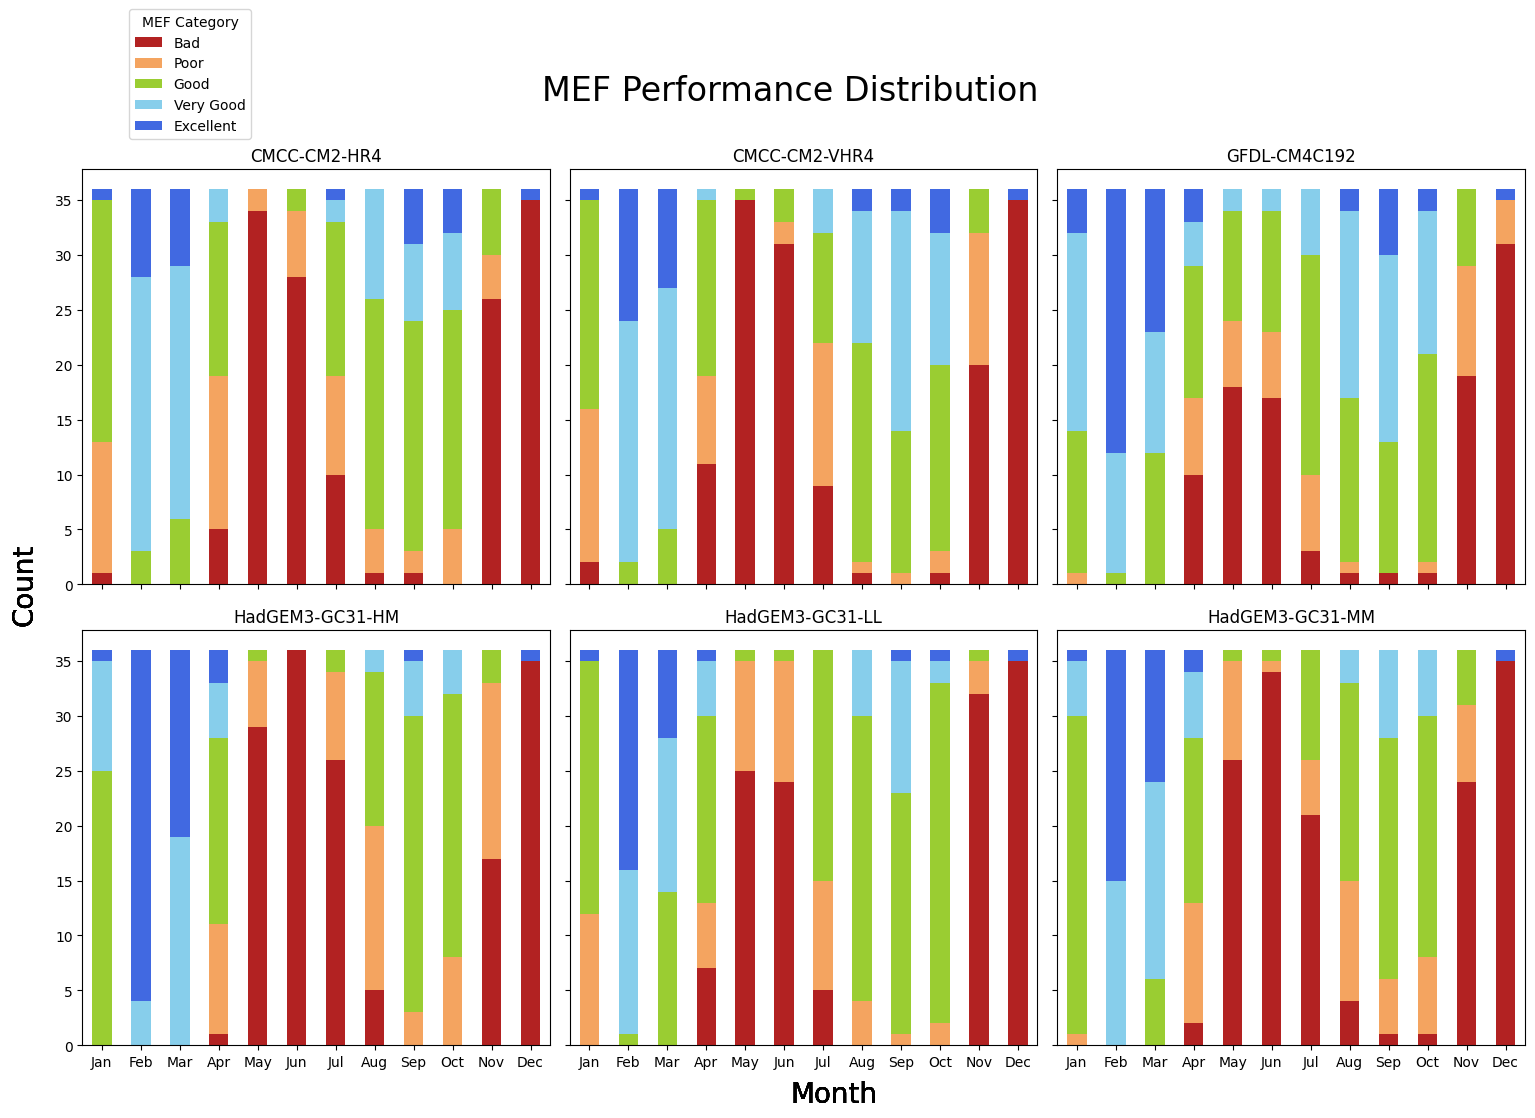

In [8]:
for j in range(0,int(mct/6)):
    fig, axes = plt.subplots(int(mct/3), 3, figsize=(15, 10)) # Adjust grid size here
    
    for i in range(0,mct):
        ax = axes[i // 3, i % 3]
        monthly_data = MEF_b[i+j*int(mct/2),:].resample(tdim='MS').mean()
        
        def bin_data(array, bins):
            return np.digitize(array, bins)
        
        binned_data = xr.apply_ufunc(
            bin_data, monthly_data, 
            input_core_dims=[[]], kwargs={'bins': bins})
        
        df = binned_data.to_dataframe(name='value').reset_index()
        
        # Count occurrences in each bin
        df['bin'] = pd.cut(df['value'], bins=bins2, labels=labels)
        bin_counts = df.groupby([df['tdim'].dt.month, 'bin'], observed=False).size().unstack(fill_value=0)
        bin_counts.index = pd.to_datetime(bin_counts.index, format='%m').strftime('%b')
        
        # Plot stacked bar graph
        bin_counts.plot(kind='bar', stacked=True, color=[colors[label] for label in bin_counts.columns], ax=ax)
        
        ax.set_xticklabels(bin_counts.index, rotation=0)
        ax.set_title(f'{model[i+j*int(mct/2)]}'); ax.legend().remove(); ax.set_xlabel('')
        if i // 3 < 1:
            ax.set_xticklabels('')
        if i % 3 != 0:
            ax.set_ylabel(''); ax.set_yticklabels('');

        fig.text(-0.02, 0.50, 'Count', va='center', rotation='vertical', fontsize=20)
        fig.text(0.5, -0.01, 'Month', va='center', rotation='horizontal', fontsize=20)
        
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title='MEF Category', bbox_to_anchor=(0.1, 1.01), loc = 'center', borderaxespad=0)
    fig.suptitle('MEF Performance Distribution', fontsize=24, x=0.5, y=1.01)
    plt.tight_layout()
    # plt.savefig(f'/Data/PLOTS/Combined/Monthly-Dist/Cumulative_MD-{j}.pdf', bbox_inches='tight') # Define desired plot image destination and name.

### 11. MEF Compressed Values
Modify subplot gridsize as necessary for number of models to be plotted. <br>
Define desired plot image destination and name.

In [8]:
levels=[-100, 0, 0.2, 0.5, 0.65, 1.0]
colors = ['firebrick','sandybrown','yellowgreen','deepskyblue','royalblue']
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(levels, cmap.N, clip=True)

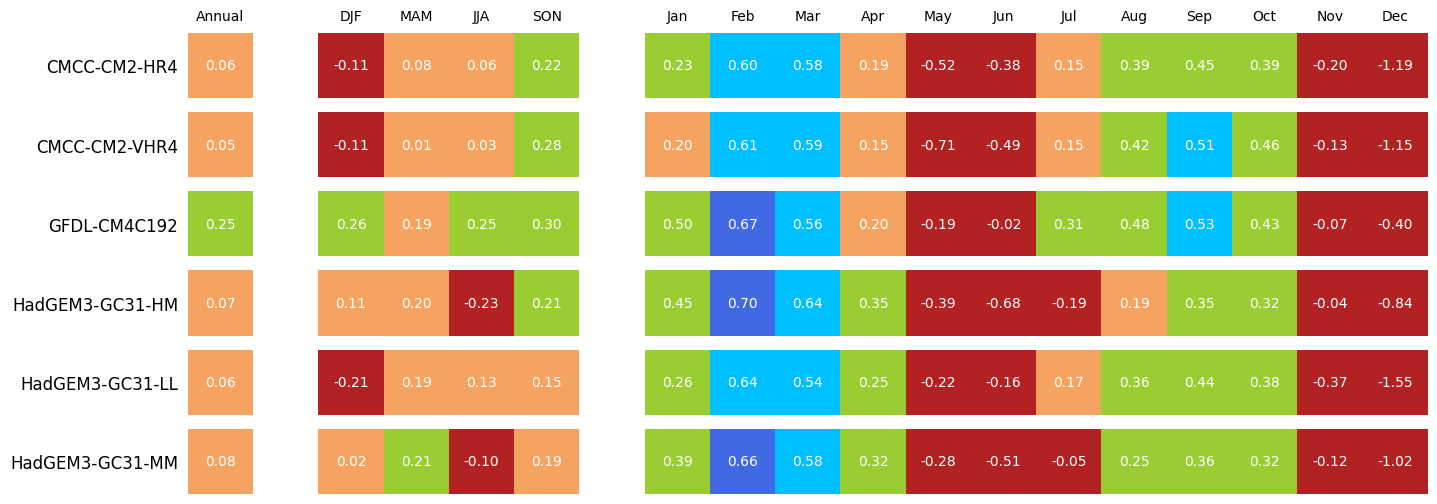

In [9]:
fig, axes = plt.subplots(mct, 1, figsize=(16, 6))
for i in range(mct):
    ax = axes[i]
    MEFA = MEF_b[i,:].mean(dim='tdim').values
    MEFS = MEF_b[i,:].groupby('time.season').mean(dim='tdim').values
    MEFM = MEF_b[i,:].groupby('time.month').mean(dim='tdim').values
    MEF_heat = np.concatenate([[MEFA], [np.nan], [MEFS[0]], [MEFS[2]], [MEFS[1]], [MEFS[3]], [np.nan], MEFM])
    values = MEF_heat.reshape(1,-1)
    
    cax = ax.matshow(values, cmap=cmap, norm=norm)
    
    ax.set_yticks([0]); ax.tick_params(axis='y', left=False);
    ax.set_yticklabels([f'{model[i]}'], fontsize=12)
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    custom_labels = ['Annual','','DJF','MAM','JJA','SON','',
                     'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    if i == 0:
        ax.set_xticks(np.arange(values.shape[1]))
        ax.set_xticklabels(custom_labels, rotation=0)
    else:
        ax.set_xticks([])
        
    
    for (i, j), val in np.ndenumerate(values):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', size=10)
    for spine in ax.spines.values():
        spine.set_visible(False)
plt.savefig(f'/Users/crcarver/Desktop/AOS_THESIS/MSc_Cameron/Data/PLOTS/Combined/Compressed-PI/Cumulative_PI-{mct}.pdf', bbox_inches='tight') # Define desired plot image destination and name.